# Analyzing suggestions texts
-------------------

> <i>Description: In this notebook, we research if there are any significant patterns or insights in suggestion data.</i>

Input Files: 
1) text_data_classes_sentiment.xlsx

Output:
1) suggestions.xlsx

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

* text_data_classes_sentiment.xlsx is a result of text classification and sentiment determination. 

In [3]:
df = pd.read_excel('text_data_classes_sentiment.xlsx')
# Saving only neccessary columns
df = df[df['year'] >= 2019][['uuid', 'date', 'year', 'position', 'position_code', 'department', 'suggestion', 'country', 'file', 'suggestion_class', 'suggestion_sentiment']]

### Visualization

In [4]:
def plot_sentiment_counts(df, sentiment_column='suggestion_sentiment', size=(6,4)):
    """
    Plots a bar chart of sentiment counts within the specified sentiment column of a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the sentiment data.
    - sentiment_column (str): The column in the DataFrame where sentiment values ('neutral', 'positive', 'negative') are stored.
                              Defaults to 'suggestion_sentiment'.
    - size (tuple): The size of the plot in inches, provided as (width, height). Defaults to (6,4).

    """
    # Calculate the value counts for the sentiment column (neutral, positive, negative)
    sentiment_counts = df[df[sentiment_column].notna()][sentiment_column].value_counts()
    
    # Create the bar plot
    plt.figure(figsize=size)
    sentiment_counts.plot(kind='bar', color=['teal', 'orange', 'salmon'])
    
    # Add title and labels
    plt.title(f'Sentiment Counts for {sentiment_column}', fontsize=16)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Count of Reviews', fontsize=12)
    
    # Display the plot
    plt.xticks(rotation=0)
    plt.show()

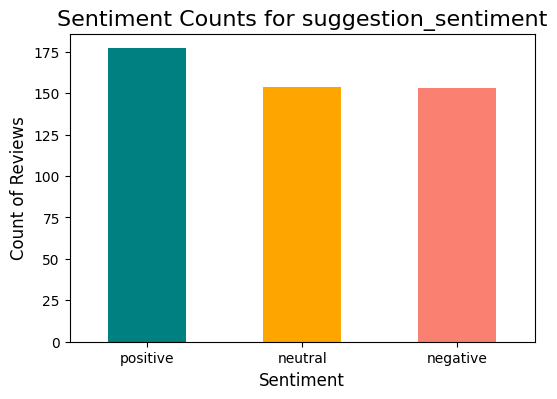

In [5]:
plot_sentiment_counts(df, sentiment_column='suggestion_sentiment')

In [6]:
category_map = ["Diversity & Equity & Inclusion", "Authenticity", "Collaboration & Teamwork & Social Culture", 
                "Creativity and Innovation", "Professional Development and Continuous Learning", "Youthful Spirit", 
                "Digital Transformation & Process Management", "Leadership & Communication", "Fashion and Lifestyle Benefits", 
                "Health and Well-being", "Work-Life Balance & Flexibility", "Mobility & Accessibility", 
                "Financial Compensation & Benefits", "Device Leasing and Corporate Benefits", "Social and Recreational Benefits"]

In [7]:
def plot_category_distribution(df, category_column='suggestion_class', category_map=None, figsize=(10, 6)):
    """
    Plots the distribution of categories and their percentages from a specified column in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the category data.
    - category_column (str): The column in the DataFrame with comma-separated category values. Defaults to 'suggestion_class'.
    - category_map (dict): An optional dictionary to filter categories based on specific mapping. Only categories present in this map will be plotted.
    - figsize (tuple): The size of the plot in inches, provided as (width, height). Defaults to (10, 6).

    """
    # Split the category column entries into individual categories and count their frequencies
    categories = df[category_column].dropna().str.split(', ').sum()
    category_counts = Counter(categories)
    
    # Filter categories based on the provided category_map, if any
    if category_map:
        filtered_category_counts = {category: count for category, count in category_counts.items() if category in category_map}
    else:
        filtered_category_counts = category_counts

    # Sort category counts in ascending order
    sorted_category_counts = dict(sorted(filtered_category_counts.items(), key=lambda item: item[1], reverse=False))

    # Calculate the percentage each category contributes to the total number of mentions
    total_mentions = sum(sorted_category_counts.values())
    percentages = [(count / total_mentions) * 100 for count in sorted_category_counts.values()]

    # Plotting the sorted frequencies with percentages
    plt.figure(figsize=figsize)
    plt.barh(list(sorted_category_counts.keys()), list(sorted_category_counts.values()), color='teal')

    # Add percentage text next to the bars
    for index, (count, percentage) in enumerate(zip(sorted_category_counts.values(), percentages)):
        plt.text(count, index, f'{percentage:.2f}%', va='center')

    plt.xlabel('Total Number of Mentions')
    plt.ylabel('Core Values & Benefits')
    plt.title('Frequency of Core Values & Benefits with Percentage of Total Mentions')
    plt.tight_layout()
    plt.show()

In [ ]:
# Creating extra dataframes for each sentiment
df_positive = df[df['suggestion_sentiment'] == 'positive']
df_negative = df[df['suggestion_sentiment'] == 'negative']
df_neutral = df[df['suggestion_sentiment'] == 'neutral']

### Frequency of Core Values & Benefits with Percentage of Total Mentions for all sentiments

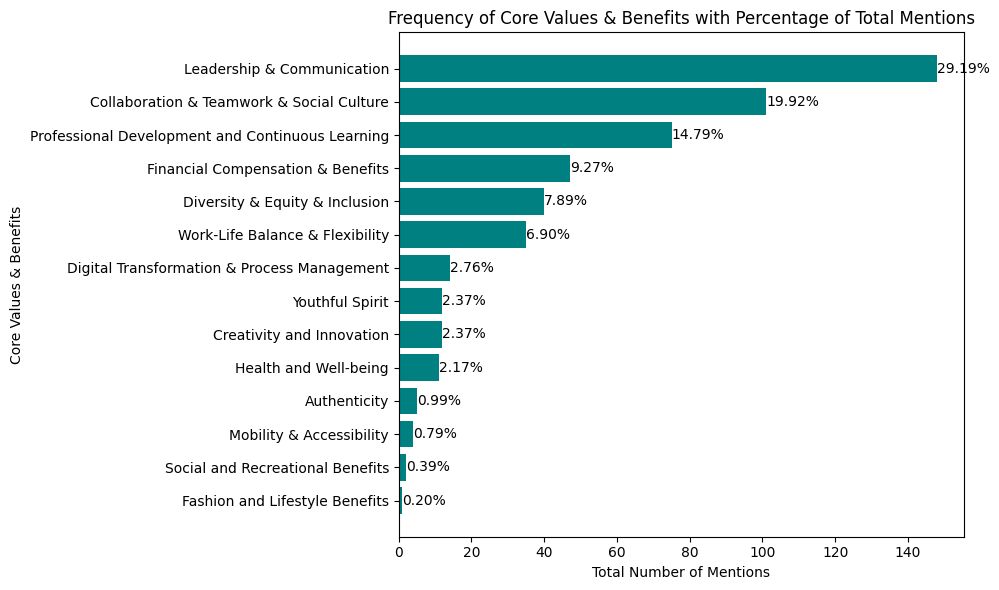

In [11]:
plot_category_distribution(df, category_column='suggestion_class', category_map=category_map, figsize=(10, 6))

### Frequency of Core Values & Benefits with Percentage of Total Mentions for positive sentiment

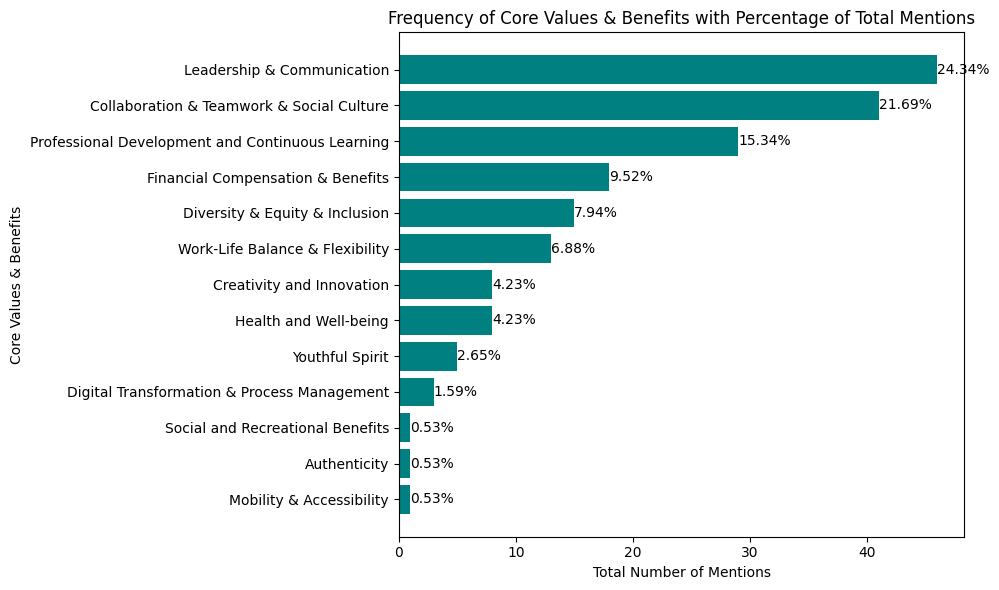

In [12]:
plot_category_distribution(df_positive, category_column='suggestion_class', category_map=category_map, figsize=(10, 6))

### Frequency of Core Values & Benefits with Percentage of Total Mentions for negative sentiments

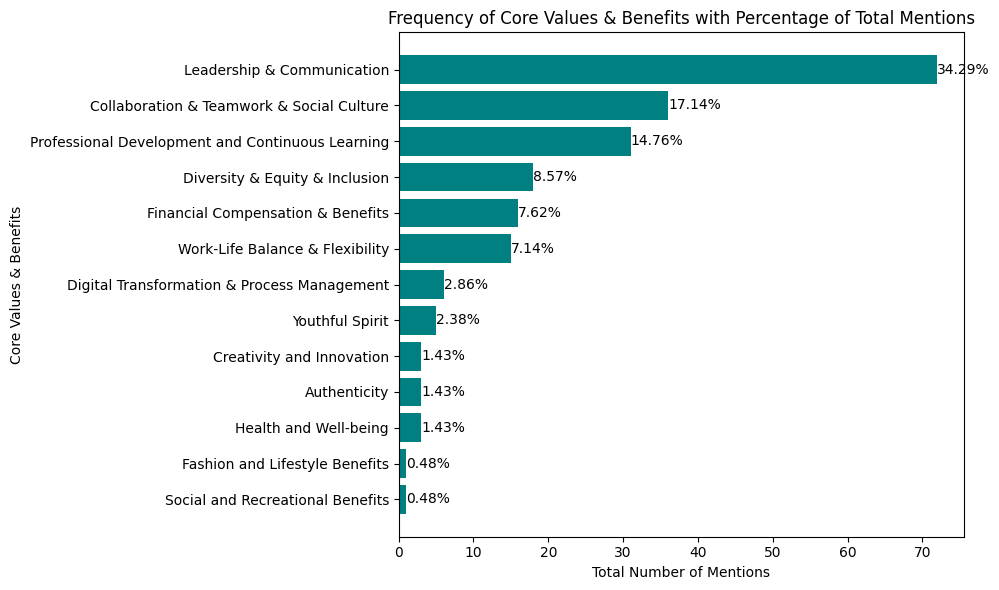

In [13]:
plot_category_distribution(df_negative, category_column='suggestion_class', category_map=category_map, figsize=(10, 6))

### Frequency of Core Values & Benefits with Percentage of Total Mentions for neutral sentiments

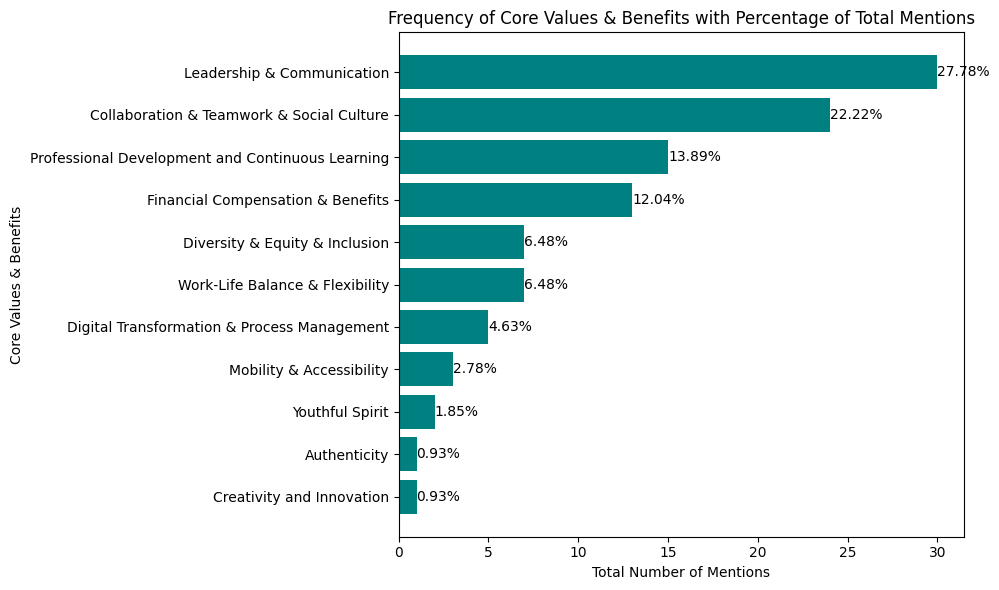

In [14]:
plot_category_distribution(df_neutral, category_column='suggestion_class', category_map=category_map, figsize=(10, 6))

In [15]:
# Saving suggestions dataframe in a new file
df.to_excel('suggestions.xlsx')

### End of the notebook